In [1]:
import pandas as pd

In [2]:
import numpy as np

In [168]:
import seaborn as sns

In [4]:
df=pd.read_excel(r"C:\Users\Sourabh\Documents\info_py\Flight_Price_Train1.xlsx")

In [5]:
df1=df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Date_of_Journey   10683 non-null  object
 2   Source            10683 non-null  object
 3   Destination       10683 non-null  object
 4   Route             10682 non-null  object
 5   Dep_Time          10683 non-null  object
 6   Arrival_Time      10683 non-null  object
 7   Duration          10683 non-null  object
 8   Duration_hours    10683 non-null  object
 9   duration_minutes  10683 non-null  object
 10  Total_Stops       10682 non-null  object
 11  Additional_Info   10683 non-null  object
 12  Price             10683 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Duration_hours',
       'duration_minutes', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

### preprocessing

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_hours,duration_minutes,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,2h,50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,7h,25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25:00,19h,19h,0m,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30:00,5h 25m,5h,25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35:00,4h 45m,4h,45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25:00,2h 30m,2h,30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20:00,2h 35m,2h,35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20:00,3h,3h,0m,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10:00,2h 40m,2h,40m,non-stop,No info,12648


### Converting the Duration , Arrival time, departure time in minutes to get it into proper numerical format.

In [11]:
df['dep_hours']=df['Dep_Time'].apply(lambda x:x.split(':')[0])

In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_hours,duration_minutes,Total_Stops,Additional_Info,Price,dep_hours
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,2h,50m,non-stop,No info,3897,22
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,7h,25m,2 stops,No info,7662,05
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25:00,19h,19h,0m,2 stops,No info,13882,09
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30:00,5h 25m,5h,25m,1 stop,No info,6218,18
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35:00,4h 45m,4h,45m,1 stop,No info,13302,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25:00,2h 30m,2h,30m,non-stop,No info,4107,19
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20:00,2h 35m,2h,35m,non-stop,No info,4145,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20:00,3h,3h,0m,non-stop,No info,7229,08
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10:00,2h 40m,2h,40m,non-stop,No info,12648,11


In [13]:
df['dep_minutes']=df['Dep_Time'].apply(lambda x:x.split(':')[1])

In [14]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_hours,duration_minutes,Total_Stops,Additional_Info,Price,dep_hours,dep_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,2h,50m,non-stop,No info,3897,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,7h,25m,2 stops,No info,7662,05,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25:00,19h,19h,0m,2 stops,No info,13882,09,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30:00,5h 25m,5h,25m,1 stop,No info,6218,18,05
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35:00,4h 45m,4h,45m,1 stop,No info,13302,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25:00,2h 30m,2h,30m,non-stop,No info,4107,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20:00,2h 35m,2h,35m,non-stop,No info,4145,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20:00,3h,3h,0m,non-stop,No info,7229,08,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10:00,2h 40m,2h,40m,non-stop,No info,12648,11,30


In [15]:
df.dep_hours=df.dep_hours.astype(int)

In [16]:
df.dep_minutes=df.dep_minutes.astype(int)

In [17]:
df['dep_hours']=df['dep_hours'].apply(lambda x:x*60)

In [18]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_hours,duration_minutes,Total_Stops,Additional_Info,Price,dep_hours,dep_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,2h,50m,non-stop,No info,3897,1320,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,7h,25m,2 stops,No info,7662,300,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25:00,19h,19h,0m,2 stops,No info,13882,540,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30:00,5h 25m,5h,25m,1 stop,No info,6218,1080,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35:00,4h 45m,4h,45m,1 stop,No info,13302,960,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25:00,2h 30m,2h,30m,non-stop,No info,4107,1140,55
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20:00,2h 35m,2h,35m,non-stop,No info,4145,1200,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20:00,3h,3h,0m,non-stop,No info,7229,480,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10:00,2h 40m,2h,40m,non-stop,No info,12648,660,30


In [19]:
df['dep_time_in_minutes']=df['dep_hours']+df['dep_minutes']

In [20]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_hours,duration_minutes,Total_Stops,Additional_Info,Price,dep_hours,dep_minutes,dep_time_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,2h,50m,non-stop,No info,3897,1320,20,1340
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,7h,25m,2 stops,No info,7662,300,50,350
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25:00,19h,19h,0m,2 stops,No info,13882,540,25,565
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30:00,5h 25m,5h,25m,1 stop,No info,6218,1080,5,1085
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35:00,4h 45m,4h,45m,1 stop,No info,13302,960,50,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25:00,2h 30m,2h,30m,non-stop,No info,4107,1140,55,1195
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20:00,2h 35m,2h,35m,non-stop,No info,4145,1200,45,1245
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20:00,3h,3h,0m,non-stop,No info,7229,480,20,500
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10:00,2h 40m,2h,40m,non-stop,No info,12648,660,30,690


In [21]:
df['Duration_hours1']=df['Duration_hours'].apply(lambda x:x.split('h')[0])

In [22]:
df['Duration_minutes1']=df['duration_minutes'].apply(lambda x:x.split('m')[0])

In [23]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_hours,duration_minutes,Total_Stops,Additional_Info,Price,dep_hours,dep_minutes,dep_time_in_minutes,Duration_hours1,Duration_minutes1
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,2h,50m,non-stop,No info,3897,1320,20,1340,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,7h,25m,2 stops,No info,7662,300,50,350,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25:00,19h,19h,0m,2 stops,No info,13882,540,25,565,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30:00,5h 25m,5h,25m,1 stop,No info,6218,1080,5,1085,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35:00,4h 45m,4h,45m,1 stop,No info,13302,960,50,1010,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25:00,2h 30m,2h,30m,non-stop,No info,4107,1140,55,1195,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20:00,2h 35m,2h,35m,non-stop,No info,4145,1200,45,1245,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20:00,3h,3h,0m,non-stop,No info,7229,480,20,500,3,0
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10:00,2h 40m,2h,40m,non-stop,No info,12648,660,30,690,2,40


In [24]:
filt=df['Duration_hours1']=='5m'
df.loc[filt,'Duration_hours1']='0'

In [25]:
df.Duration_hours1=df.Duration_hours1.astype(int)

In [26]:
df.Duration_minutes1=df.Duration_minutes1.astype(int)

In [27]:
df['Duration_hours1']=df['Duration_hours1'].apply(lambda x:x*60)

In [28]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_hours,duration_minutes,Total_Stops,Additional_Info,Price,dep_hours,dep_minutes,dep_time_in_minutes,Duration_hours1,Duration_minutes1
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,2h,50m,non-stop,No info,3897,1320,20,1340,120,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,7h,25m,2 stops,No info,7662,300,50,350,420,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25:00,19h,19h,0m,2 stops,No info,13882,540,25,565,1140,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30:00,5h 25m,5h,25m,1 stop,No info,6218,1080,5,1085,300,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35:00,4h 45m,4h,45m,1 stop,No info,13302,960,50,1010,240,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25:00,2h 30m,2h,30m,non-stop,No info,4107,1140,55,1195,120,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20:00,2h 35m,2h,35m,non-stop,No info,4145,1200,45,1245,120,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20:00,3h,3h,0m,non-stop,No info,7229,480,20,500,180,0
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10:00,2h 40m,2h,40m,non-stop,No info,12648,660,30,690,120,40


In [29]:
df['total_duration_in_minutes']=df['Duration_hours1']+df['Duration_minutes1']

In [30]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_hours,duration_minutes,Total_Stops,Additional_Info,Price,dep_hours,dep_minutes,dep_time_in_minutes,Duration_hours1,Duration_minutes1,total_duration_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,2h,50m,non-stop,No info,3897,1320,20,1340,120,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,7h,25m,2 stops,No info,7662,300,50,350,420,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25:00,19h,19h,0m,2 stops,No info,13882,540,25,565,1140,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30:00,5h 25m,5h,25m,1 stop,No info,6218,1080,5,1085,300,25,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35:00,4h 45m,4h,45m,1 stop,No info,13302,960,50,1010,240,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25:00,2h 30m,2h,30m,non-stop,No info,4107,1140,55,1195,120,30,150
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20:00,2h 35m,2h,35m,non-stop,No info,4145,1200,45,1245,120,35,155
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20:00,3h,3h,0m,non-stop,No info,7229,480,20,500,180,0,180
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10:00,2h 40m,2h,40m,non-stop,No info,12648,660,30,690,120,40,160


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10461 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Airline                    10461 non-null  object        
 1   Date_of_Journey            10461 non-null  datetime64[ns]
 2   Source                     10461 non-null  object        
 3   Destination                10461 non-null  object        
 4   Route                      10460 non-null  object        
 5   Dep_Time                   10461 non-null  object        
 6   Arrival_Time               10461 non-null  object        
 7   Duration                   10461 non-null  object        
 8   Duration_hours             10461 non-null  object        
 9   duration_minutes           10461 non-null  object        
 10  Total_Stops                10460 non-null  object        
 11  Additional_Info            10461 non-null  object        
 12  Pric

In [32]:
df['Arrival_Time_hour']=df['Arrival_Time'].apply(lambda x:x.hour)

In [33]:
df['Arrival_Time_minute']=df['Arrival_Time'].apply(lambda x:x.minute)

In [34]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_hours,duration_minutes,...,Additional_Info,Price,dep_hours,dep_minutes,dep_time_in_minutes,Duration_hours1,Duration_minutes1,total_duration_in_minutes,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,2h,50m,...,No info,3897,1320,20,1340,120,50,170,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,7h,25m,...,No info,7662,300,50,350,420,25,445,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25:00,19h,19h,0m,...,No info,13882,540,25,565,1140,0,1140,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30:00,5h 25m,5h,25m,...,No info,6218,1080,5,1085,300,25,325,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35:00,4h 45m,4h,45m,...,No info,13302,960,50,1010,240,45,285,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25:00,2h 30m,2h,30m,...,No info,4107,1140,55,1195,120,30,150,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20:00,2h 35m,2h,35m,...,No info,4145,1200,45,1245,120,35,155,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20:00,3h,3h,0m,...,No info,7229,480,20,500,180,0,180,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10:00,2h 40m,2h,40m,...,No info,12648,660,30,690,120,40,160,14,10


In [35]:
df['Arrival_Time_hour']=df['Arrival_Time_hour'].apply(lambda x:x*60)

In [36]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_hours,duration_minutes,...,Additional_Info,Price,dep_hours,dep_minutes,dep_time_in_minutes,Duration_hours1,Duration_minutes1,total_duration_in_minutes,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,2h,50m,...,No info,3897,1320,20,1340,120,50,170,60,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,7h,25m,...,No info,7662,300,50,350,420,25,445,780,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25:00,19h,19h,0m,...,No info,13882,540,25,565,1140,0,1140,240,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30:00,5h 25m,5h,25m,...,No info,6218,1080,5,1085,300,25,325,1380,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35:00,4h 45m,4h,45m,...,No info,13302,960,50,1010,240,45,285,1260,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25:00,2h 30m,2h,30m,...,No info,4107,1140,55,1195,120,30,150,1320,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20:00,2h 35m,2h,35m,...,No info,4145,1200,45,1245,120,35,155,1380,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20:00,3h,3h,0m,...,No info,7229,480,20,500,180,0,180,660,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10:00,2h 40m,2h,40m,...,No info,12648,660,30,690,120,40,160,840,10


In [37]:
df['total_arrival_time_minutes']=df['Arrival_Time_hour']+df['Arrival_Time_minute']

In [38]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_hours,duration_minutes,...,Price,dep_hours,dep_minutes,dep_time_in_minutes,Duration_hours1,Duration_minutes1,total_duration_in_minutes,Arrival_Time_hour,Arrival_Time_minute,total_arrival_time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10:00,2h 50m,2h,50m,...,3897,1320,20,1340,120,50,170,60,10,70
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15:00,7h 25m,7h,25m,...,7662,300,50,350,420,25,445,780,15,795
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25:00,19h,19h,0m,...,13882,540,25,565,1140,0,1140,240,25,265
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30:00,5h 25m,5h,25m,...,6218,1080,5,1085,300,25,325,1380,30,1410
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35:00,4h 45m,4h,45m,...,13302,960,50,1010,240,45,285,1260,35,1295


In [39]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Duration_hours',
       'duration_minutes', 'Total_Stops', 'Additional_Info', 'Price',
       'dep_hours', 'dep_minutes', 'dep_time_in_minutes', 'Duration_hours1',
       'Duration_minutes1', 'total_duration_in_minutes', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'total_arrival_time_minutes'],
      dtype='object')

In [40]:
df.drop(columns=['Dep_Time', 'Arrival_Time', 'Duration', 'Duration_hours',
       'duration_minutes','dep_hours',
       'dep_minutes','Duration_hours1',
       'Duration_minutes1','Arrival_Time_hour',
       'Arrival_Time_minute'],axis=1,inplace=True)

In [41]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,1340,170,70
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,350,445,795
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,565,1140,265
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,1085,325,1410
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1010,285,1295
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,1195,150,1345
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,1245,155,1400
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,500,180,680
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,690,160,850


In [42]:
df.dtypes

Airline                               object
Date_of_Journey               datetime64[ns]
Source                                object
Destination                           object
Route                                 object
Total_Stops                           object
Additional_Info                       object
Price                                  int64
dep_time_in_minutes                    int64
total_duration_in_minutes              int64
total_arrival_time_minutes             int64
dtype: object

In [43]:
df.describe()

,Price,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes
count,10461.000000,10461.000000,10461.000000,10461.00000
mean,9027.212504,772.988720,629.944556,828.10152
std,4624.861032,343.796677,500.742796,409.03299
min,1759.000000,20.000000,0.000000,5.00000
25%,5224.000000,480.000000,170.000000,530.00000
50%,8266.000000,705.000000,505.000000,845.00000
75%,12346.000000,1080.000000,910.000000,1155.00000
max,79512.000000,1435.000000,2860.000000,1435.00000


#### checking the na values

In [44]:
df.isna().sum()

Airline                       0
Date_of_Journey               0
Source                        0
Destination                   0
Route                         1
Total_Stops                   1
Additional_Info               0
Price                         0
dep_time_in_minutes           0
total_duration_in_minutes     0
total_arrival_time_minutes    0
dtype: int64

In [45]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1534
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

### filling the NA values with mode

In [46]:
df.Route.fillna(df.Route.mode()[0],inplace = True)

In [47]:
df.Total_Stops.fillna(df.Total_Stops.mode()[0],inplace = True)

In [48]:
df.isna().sum()

Airline                       0
Date_of_Journey               0
Source                        0
Destination                   0
Route                         0
Total_Stops                   0
Additional_Info               0
Price                         0
dep_time_in_minutes           0
total_duration_in_minutes     0
total_arrival_time_minutes    0
dtype: int64


### checking and removing outliers

<Axes: >

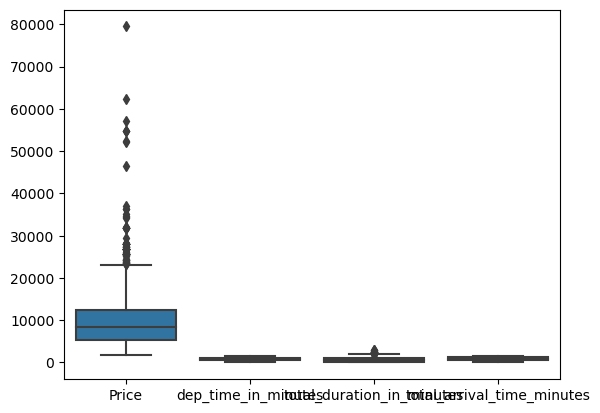

In [49]:
sns.boxplot(data=df)

In [50]:
for i in df:                  
    if df[i].dtypes in ("float64","int64"):
        q1 = df[i].quantile(0.25) 
        q3 = df[i].quantile(0.75)  
        iqr = q3-q1 
        ul = q3 + 1.5*iqr       
        ll = q1 - 1.5*iqr 
        df[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

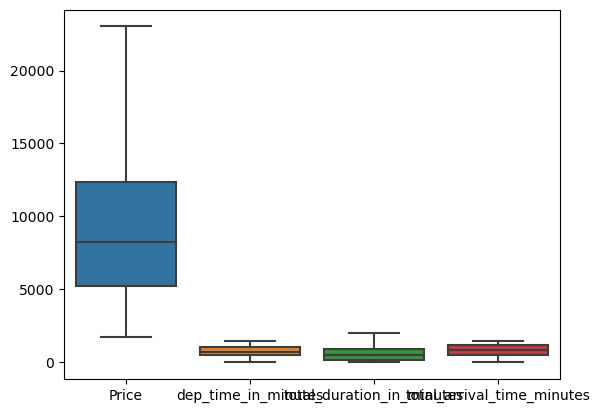

In [51]:
sns.boxplot(data=df)

In [52]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Total_Stops', 'Additional_Info', 'Price', 'dep_time_in_minutes',
       'total_duration_in_minutes', 'total_arrival_time_minutes'],
      dtype='object')

In [53]:
for i in ['Airline','Source', 'Destination', 'Route','Additional_Info']:
    print(df[i].value_counts())

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Delhi       4346
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     912
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
DEL → BOM → COK          2377
BLR → DEL                1534
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → 

In [54]:
df.Additional_Info = df.Additional_Info.replace({'No Info' : 'No info'})

### final dataframe after cleaning

In [55]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,1340,170,70
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,350,445,795
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,565,1140,265
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,1085,325,1410
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1010,285,1295
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,1195,150,1345
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,1245,155,1400
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,500,180,680
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,690,160,850


### analysis part

### Which airline is most preferred airline


In [56]:
df1.Airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### Jet airways is the most preferred airline

### the majority of the flights take off from which source

In [57]:
df1.Source.value_counts()

Delhi       4346
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: Source, dtype: int64

#### Delhi is where most flights take off from

### maximum flights land in which destination

In [58]:
df1.Destination.value_counts()

Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     912
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

#### Maximum flights land in Cochin

## model building

In [67]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,1340,170,70
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,350,445,795
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,565,1140,265
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,1085,325,1410
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1010,285,1295
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,1195,150,1345
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,1245,155,1400
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,500,180,680
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,690,160,850


#### selecting Numerical and catgorical columns and applying label encoder

In [68]:
Quantitative_Variable = df[df.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Price,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes
0,3897,1340,170,70
1,7662,350,445,795
2,13882,565,1140,265


In [69]:
Qualitative_Variable = df[df.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info


In [70]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) 
Qualitative_Variable.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,18,4,7
1,1,3,0,84,1,7
2,4,2,1,118,1,7
3,3,3,0,91,0,7
4,3,0,5,29,0,7


In [71]:
df_combined = pd.concat([Quantitative_Variable, Qualitative_Variable],axis=1)

df_combined.head()

,Price,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3897,1340,170,70,3,0,5,18,4,7
1,7662,350,445,795,1,3,0,84,1,7
2,13882,565,1140,265,4,2,1,118,1,7
3,6218,1085,325,1410,3,3,0,91,0,7
4,13302,1010,285,1295,3,0,5,29,0,7


In [72]:
import numpy as np

### Price was skewed so applying log to get it into normal form

<Axes: xlabel='Price', ylabel='Count'>

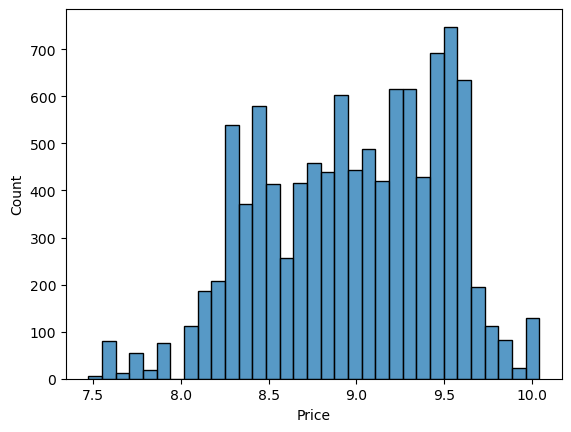

In [167]:
sns.histplot(data=np.log(df['Price']))

##### data partition

In [165]:

X = df_combined.drop(['Price'],axis=1)


y = df_combined[['Price']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,np.log(y),test_size=0.2,random_state=231)

In [166]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price
1468,1375,810,745,4,0,5,5,0,7,9.533655
9642,600,555,1155,1,2,1,104,0,7,9.091444
7467,570,155,725,8,1,4,127,4,7,8.748305
8257,990,365,1355,4,3,0,66,0,7,9.601098
195,585,135,720,8,1,4,127,4,6,8.172729


### decision tree

In [158]:

from sklearn import tree

dt = tree.DecisionTreeRegressor(criterion='absolute_error', 
                                 min_samples_leaf=20, 
                                 min_samples_split=35, 
                                 max_depth=5) 

dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=20, min_samples_split=35)

In [77]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price
1468,1375,810,745,4,0,5,5,0,7,9.533655
9642,600,555,1155,1,2,1,104,0,7,9.091444
7467,570,155,725,8,1,4,127,4,7,8.748305
8257,990,365,1355,4,3,0,66,0,7,9.601098
195,585,135,720,8,1,4,127,4,6,8.172729


In [78]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Predicted
1468,1375,810,745,4,0,5,5,0,7,9.533655,9.725317
9642,600,555,1155,1,2,1,104,0,7,9.091444,9.032648
7467,570,155,725,8,1,4,127,4,7,8.748305,8.477204
8257,990,365,1355,4,3,0,66,0,7,9.601098,9.563178
195,585,135,720,8,1,4,127,4,6,8.172729,8.253488


In [79]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.Predicted)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  73.0


#### test

In [80]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price
4294,310,170,480,1,2,1,106,4,7,8.556606
9493,800,135,935,3,1,4,127,4,7,8.466321
7700,1065,140,1205,8,1,4,127,4,7,8.187855
3965,385,90,475,3,4,3,48,4,7,8.387540
8409,580,2020,265,4,2,1,116,1,7,9.458684


In [81]:
test['Predicted'] = dt.predict(X_test)  # MODEL = dt
test.head()

,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Predicted
4294,310,170,480,1,2,1,106,4,7,8.556606,8.336630
9493,800,135,935,3,1,4,127,4,7,8.466321,8.253488
7700,1065,140,1205,8,1,4,127,4,7,8.187855,8.253488
3965,385,90,475,3,4,3,48,4,7,8.387540,8.189522
8409,580,2020,265,4,2,1,116,1,7,9.458684,9.563178


In [82]:
from sklearn.metrics import r2_score
r2 = r2_score(test.Price,test.Predicted)
print('R2 score for model Performance on test : ', np.round(r2,2)*100)

R2 score for model Performance on test :  74.0


In [83]:
from sklearn.metrics import mean_squared_error 
# calculate the mean squared error
model_mse = mean_squared_error(train['Price'],train['Predicted'])
# calulcate the root mean squared error
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) 

RMSE of Train Data :  0.26


In [84]:
from sklearn.metrics import mean_squared_error 
# calculate the mean squared error
model_mse = mean_squared_error(test['Price'],test['Predicted'])
# calulcate the root mean squared error
model_rmse = np.sqrt(model_mse)

print("RMSE of Test Data : ",np.round(model_rmse,2)) 

RMSE of Test Data :  0.26


In [85]:
np.exp(0.26)

1.2969300866657718

### random forest

In [181]:
from sklearn.ensemble import RandomForestRegressor

Model =RandomForestRegressor(n_estimators=12, 
                               criterion="squared_error",
                               max_depth=6,  
                               min_samples_split=30,
                               min_samples_leaf=15,
                               max_features="sqrt") 

Model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=15,
                      min_samples_split=30, n_estimators=12)

In [182]:
train1=pd.concat([X_train,y_train],axis=1)
train1.head()

,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price
1468,1375,810,745,4,0,5,5,0,7,9.533655
9642,600,555,1155,1,2,1,104,0,7,9.091444
7467,570,155,725,8,1,4,127,4,7,8.748305
8257,990,365,1355,4,3,0,66,0,7,9.601098
195,585,135,720,8,1,4,127,4,6,8.172729


In [183]:
train1['Predicted']=Model.predict(X_train)
train1.head()

,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Predicted
1468,1375,810,745,4,0,5,5,0,7,9.533655,9.639005
9642,600,555,1155,1,2,1,104,0,7,9.091444,8.978713
7467,570,155,725,8,1,4,127,4,7,8.748305,8.437917
8257,990,365,1355,4,3,0,66,0,7,9.601098,9.406146
195,585,135,720,8,1,4,127,4,6,8.172729,8.249964


In [184]:
from sklearn.metrics import r2_score
r2 = r2_score(train1.Price,train1.Predicted)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  77.0


In [185]:
test1 = pd.concat([X_test,y_test],axis=1)
test1.head()

,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price
4294,310,170,480,1,2,1,106,4,7,8.556606
9493,800,135,935,3,1,4,127,4,7,8.466321
7700,1065,140,1205,8,1,4,127,4,7,8.187855
3965,385,90,475,3,4,3,48,4,7,8.387540
8409,580,2020,265,4,2,1,116,1,7,9.458684


In [186]:
test1['Predicted']=Model.predict(X_test)
test1.head()

,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Predicted
4294,310,170,480,1,2,1,106,4,7,8.556606,8.642337
9493,800,135,935,3,1,4,127,4,7,8.466321,8.422865
7700,1065,140,1205,8,1,4,127,4,7,8.187855,8.477759
3965,385,90,475,3,4,3,48,4,7,8.387540,8.277544
8409,580,2020,265,4,2,1,116,1,7,9.458684,9.473868


In [187]:
from sklearn.metrics import r2_score
r2 = r2_score(test1.Price,test1.Predicted)
print('R2 score for model Performance on test : ', np.round(r2,2)*100)

R2 score for model Performance on test :  78.0


In [188]:
from sklearn.metrics import mean_squared_error 
# calculate the mean squared error
model_mse = mean_squared_error(test1['Price'],test1['Predicted'])
# calulcate the root mean squared error
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) 

RMSE of Train Data :  0.24


In [189]:
np.exp(0.24)

1.2712491503214047

#### model comparing: from applying both the algoithms decision tree and random forest , random forest gave the higher accuracy compared to decision tree. The reason for better accuracy in RF is that multiple trees were built for predicting the accuracy and all variables were given the chance to split. Random forest is used in predicting the live data.

#### note: price conversion is done at the end of file.

### testing on live data

In [95]:
df2=pd.read_excel(r"C:\Users\Sourabh\Documents\info_py\Flight_Price_Test1.xlsx")

In [96]:
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Duration_hours,duration_minutes,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25:00,10h 55m,10h,55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20:00,4h,4h,0m,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00:00,23h 45m,23h,45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00:00,13h,13h,0m,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45:00,2h 50m,2h,50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25:00,23h 55m,23h,55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55:00,2h 35m,2h,35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25:00,6h 35m,6h,35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15:00,15h 15m,15h,15m,1 stop,No info


In [97]:
df2.drop_duplicates(inplace=True)

In [98]:
df2.shape

(2645, 12)

### Converting the Duration , Arrival time, departure time in minutes to get it into proper numerical format.

In [100]:
df2['dep_hours']=df2['Dep_Time'].apply(lambda x:x.split(':')[0])

In [101]:
df2['dep_minutes']=df2['Dep_Time'].apply(lambda x:x.split(':')[1])

In [102]:
df2.dep_hours=df2.dep_hours.astype(int)

In [103]:
df2.dep_minutes=df2.dep_minutes.astype(int)

In [104]:
df2['dep_hours']=df2['dep_hours'].apply(lambda x:x*60)

In [105]:
df2['dep_time_in_minutes']=df2['dep_hours']+df2['dep_minutes']

In [106]:
df2['Duration_hours1']=df2['Duration_hours'].apply(lambda x:x.split('h')[0])

In [107]:
df2['Duration_minutes1']=df2['duration_minutes'].apply(lambda x:x.split('m')[0])

In [108]:
filt=df2['Duration_hours1']=='5m'
df2.loc[filt,'Duration_hours1']='0'

In [109]:
df2.Duration_hours1=df2.Duration_hours1.astype(int)

In [110]:
df2.Duration_minutes1=df2.Duration_minutes1.astype(int)

In [111]:
df2['Duration_hours1']=df2['Duration_hours1'].apply(lambda x:x*60)

In [112]:
df2['total_duration_in_minutes']=df2['Duration_hours1']+df2['Duration_minutes1']

In [113]:
df2['Arrival_Time_hour']=df2['Arrival_Time'].apply(lambda x:x.hour)

In [114]:
df2['Arrival_Time_minute']=df2['Arrival_Time'].apply(lambda x:x.minute)

In [115]:
df2['Arrival_Time_hour']=df2['Arrival_Time_hour'].apply(lambda x:x*60)

In [116]:
df2['total_arrival_time_minutes']=df2['Arrival_Time_hour']+df2['Arrival_Time_minute']

In [117]:
df2.drop(columns=['Dep_Time', 'Arrival_Time', 'Duration', 'Duration_hours',
       'duration_minutes','dep_hours',
       'dep_minutes','Duration_hours1',
       'Duration_minutes1','Arrival_Time_hour',
       'Arrival_Time_minute'],axis=1,inplace=True)

In [118]:
df2

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,1050,655,265
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,380,240,620
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,1155,1425,1140
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,480,780,1260
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,non-stop,No info,1435,170,165
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,1230,1435,1225
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,non-stop,No info,860,155,1015
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,1310,395,265
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,240,915,1155


In [119]:
df2.isna().sum()

Airline                       0
Date_of_Journey               0
Source                        0
Destination                   0
Route                         0
Total_Stops                   0
Additional_Info               0
dep_time_in_minutes           0
total_duration_in_minutes     0
total_arrival_time_minutes    0
dtype: int64

### removing outliers

In [159]:
import seaborn as sns

<Axes: >

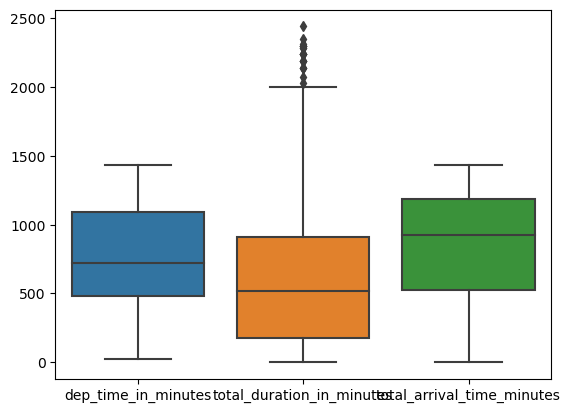

In [120]:
sns.boxplot(data=df2)

In [121]:
for i in df2:                  
    if df2[i].dtypes in ("float64","int64"):
        q1 = df2[i].quantile(0.25) 
        q3 = df2[i].quantile(0.75)  
        iqr = q3-q1 
        ul = q3 + 1.5*iqr       
        ll = q1 - 1.5*iqr 
        df2[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

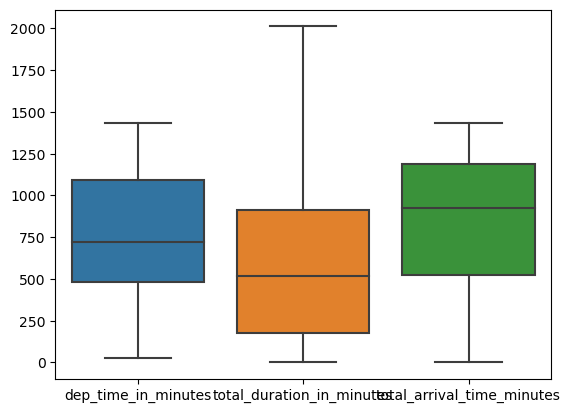

In [122]:
sns.boxplot(data=df2)

In [123]:
for i in ['Airline','Source', 'Destination', 'Route','Additional_Info','Total_Stops']:
    print(df2[i].value_counts())

Jet Airways                          886
IndiGo                               509
Air India                            432
Multiple carriers                    343
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 45
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
Delhi       1127
Kolkata      707
Banglore     550
Mumbai       186
Chennai       75
Name: Source, dtype: int64
Cochin       1127
Banglore      707
Delhi         317
New Delhi     233
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
DEL → BOM → COK                620
BLR → DEL                      386
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → IDR → GWL → DEL      1
BLR → GOI → DEL         

### Selecting Numerical and categorical columns

In [124]:
Quantitative_Variable1 = df2[df2.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable1.head(3)

,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes
0,1050,655.0,265
1,380,240.0,620
2,1155,1425.0,1140


In [125]:

Qualitative_Variable1 = df2[df2.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable1.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included


##### applying label encoder to categorical columns to get numerical form

In [126]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable1=Qualitative_Variable1.apply(LabelEncoder().fit_transform) 
Qualitative_Variable1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,4,2,1,76,0,5
1,3,3,0,65,0,5
2,4,2,1,76,0,3
3,6,2,1,76,0,5
4,0,0,2,16,4,5


In [127]:
df2_combined = pd.concat([Quantitative_Variable1, Qualitative_Variable1],axis=1)

df2_combined.head()

,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,1050,655.0,265,4,2,1,76,0,5
1,380,240.0,620,3,3,0,65,0,5
2,1155,1425.0,1140,4,2,1,76,0,3
3,480,780.0,1260,6,2,1,76,0,5
4,1435,170.0,165,0,0,2,16,4,5


### applying the model here to get the predictions

In [128]:
df2_combined['Predicted']=Model.predict(df2_combined)
df2_combined.head()

,dep_time_in_minutes,total_duration_in_minutes,total_arrival_time_minutes,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Predicted
0,1050,655.0,265,4,2,1,76,0,5,9.267763
1,380,240.0,620,3,3,0,65,0,5,8.585637
2,1155,1425.0,1140,4,2,1,76,0,3,9.274679
3,480,780.0,1260,6,2,1,76,0,5,9.238914
4,1435,170.0,165,0,0,2,16,4,5,8.764518


## Final results

In [149]:
temp=df2.loc[:,['Airline']]

In [150]:
temp1=df2_combined.loc[:,['Predicted']]

#### here applying the exponential function to get the price values back in original format values

In [151]:
temp1['Predicted']=temp1['Predicted'].apply(lambda x:np.exp(x))

In [152]:
result=pd.concat([temp,temp1],axis=1)

In [153]:
result['Predicted']=result['Predicted'].apply(lambda x:np.round(x,0))

In [154]:
result

,Airline,Predicted
0,Jet Airways,10591.0
1,IndiGo,5354.0
2,Jet Airways,10665.0
3,Multiple carriers,10290.0
4,Air Asia,6403.0
...,...,...
2666,Air India,8633.0
2667,IndiGo,4470.0
2668,Jet Airways,10665.0
2669,Air India,8859.0


#### suggestions about which airline is preferable 

In [155]:
airline_grp2=result.groupby(['Airline'])

In [156]:
airline_grp2['Predicted'].mean()

Airline
Air Asia                              6543.104651
Air India                             8804.837963
GoAir                                 7217.688889
IndiGo                                6149.088409
Jet Airways                           9590.068849
Jet Airways Business                 10148.000000
Multiple carriers                    10372.603499
Multiple carriers Premium economy    10401.666667
SpiceJet                              4798.182692
Vistara                               7216.658915
Vistara Premium economy               7982.000000
Name: Predicted, dtype: float64

#### from this results we can conclude that mutiple carriers premium economy has the highest average price in the airlines with spicejet being the least expensive of all. I would recommend to travel from air india ,jet airways business,vistara premium economy airlines from monetary point of view.

In [147]:
airline_grp3=df2.groupby(['Airline'])
airline_grp3

In [148]:
airline_grp3['total_duration_in_minutes'].mean()

Airline
Air Asia                             343.255814
Air India                            950.243056
GoAir                                281.888889
IndiGo                               307.416503
Jet Airways                          833.089729
Jet Airways Business                 305.000000
Multiple carriers                    624.635569
Multiple carriers Premium economy    620.000000
SpiceJet                             172.043269
Vistara                              590.193798
Vistara Premium economy              162.500000
Name: total_duration_in_minutes, dtype: float64

#### depending on source and destination Air india and Jet Airways are used for long hauls. While GoAir, Spicejet  and vistara premium economy are being used for shorter trips.

##### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++